In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

In [2]:
data = pd.read_csv("tips (data for regression problem).csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})
data['smoker'] = data['smoker'].map({'No': 0, 'Yes': 1})
data['day'] = data['day'].astype('category').cat.codes
data['time'] = data['time'].map({'Lunch': 0, 'Dinner': 1})

C:\Users\Arsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


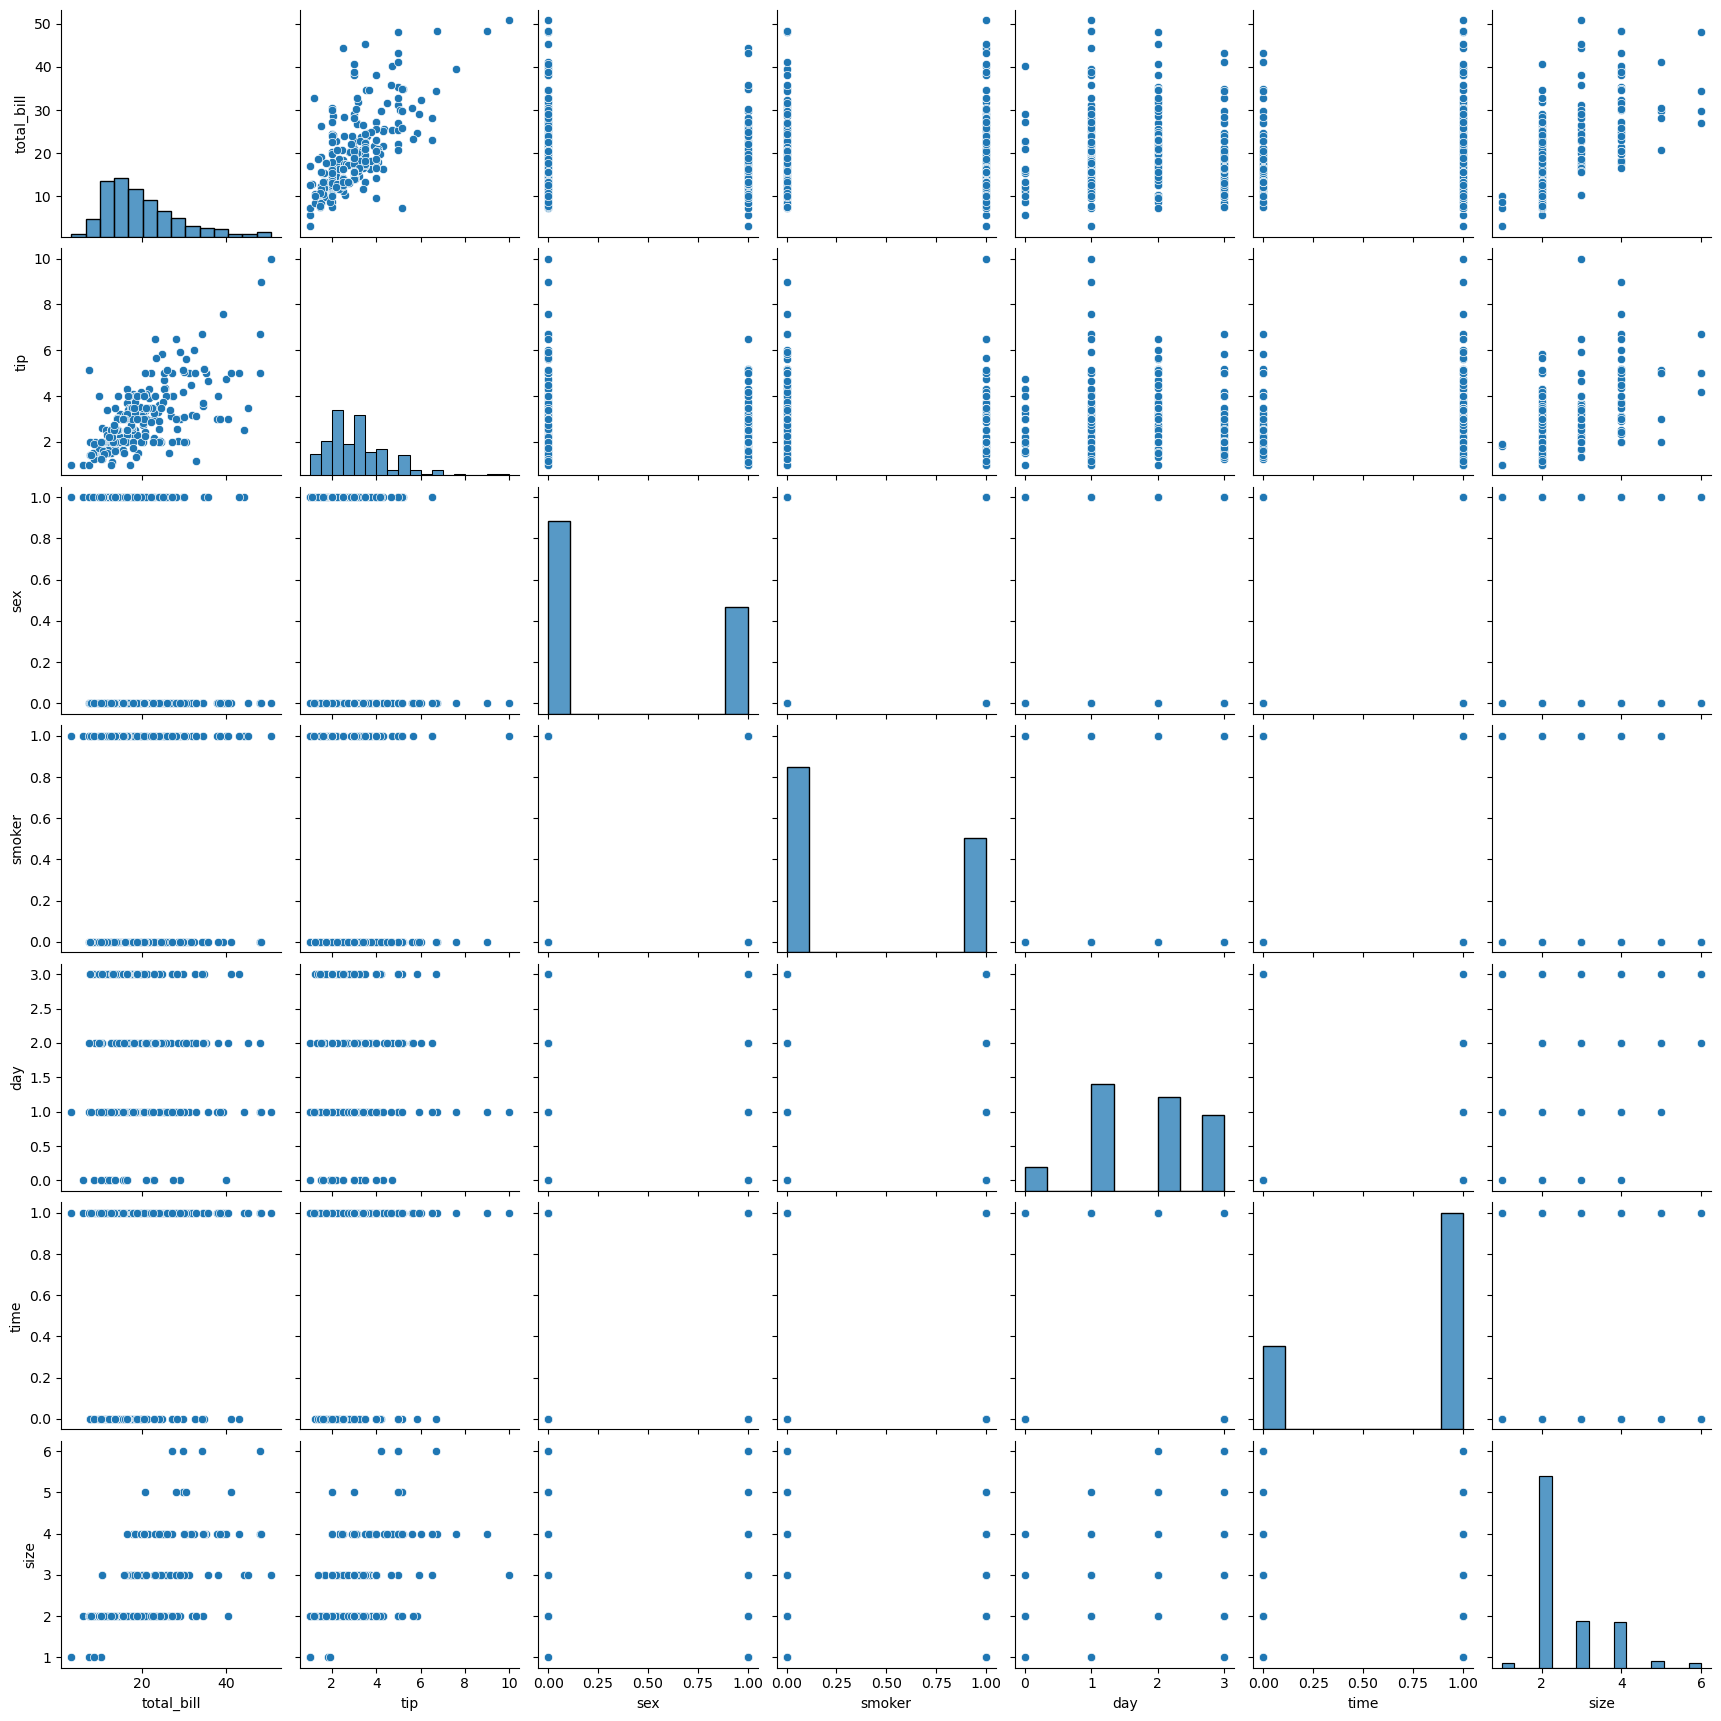

In [4]:
sns.pairplot(data)
plt.show()

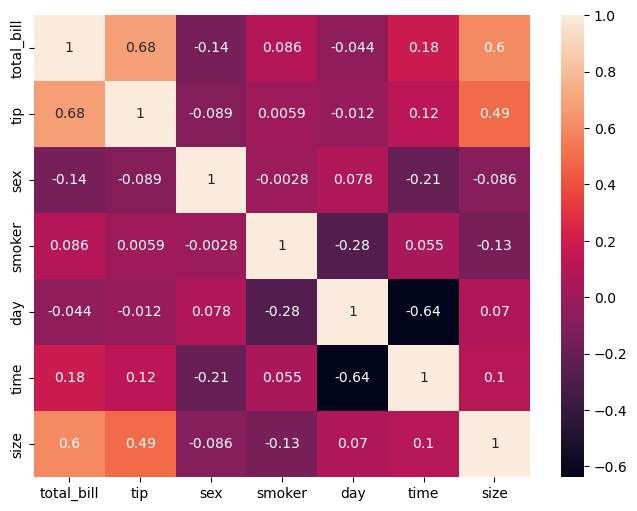

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [6]:
X = data[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
y = data['tip']
X = sm.add_constant(X)
linear_model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(linear_model)
print(f"Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_value}")


Rainbow Test Statistic: 1.2036274510126594, p-value: 0.15798464222013228


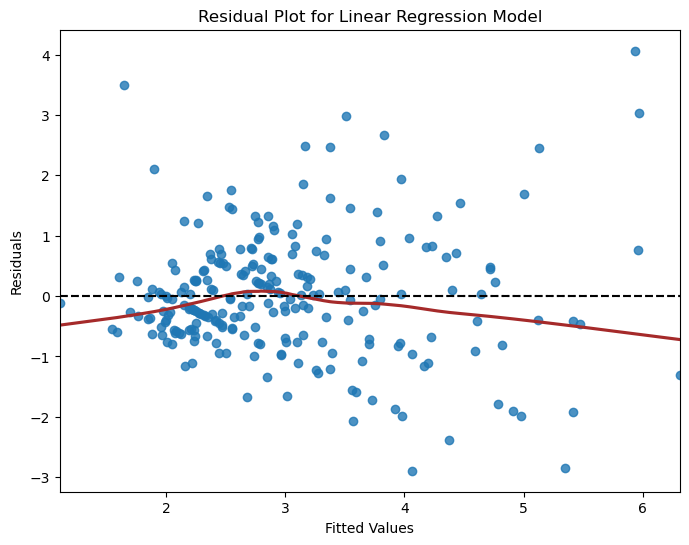

In [7]:
plt.figure(figsize=(8, 6))
sns.residplot(x=linear_model.fittedvalues, y=linear_model.resid, lowess=True, line_kws={'color': 'brown'})
plt.title("Residual Plot for Linear Regression Model")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='black', linestyle='--')
plt.show()


In [8]:
X = data[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

In [10]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({
        "Model": name,
        "R² Score": r2,
        "MAE": mae,
        "MSE": mse
    })


In [11]:
results_df = pd.DataFrame(results)
print(results_df)

               Model  R² Score       MAE       MSE
0  Linear Regression  0.444137  0.670381  0.694813
1   Ridge Regression  0.445788  0.669679  0.692749
2   Lasso Regression  0.527307  0.637484  0.590853
3      Decision Tree -0.046479  0.881224  1.308069
4      Random Forest  0.271009  0.744631  0.911218
5                SVR  0.569327  0.570691  0.538329
6                KNN  0.329403  0.726245  0.838227


In [12]:
best_model = results_df.loc[results_df['R² Score'].idxmax()]['Model']
print(f"\nThe best model based on R² Score is: {best_model}")


The best model based on R² Score is: SVR
